# Data Science Case Study

**Name:** Joseph P Gallagher 

**University:** Virginia Tech

**Majors:** Economics and Computational Modeling & Data Analytics (CMDA)
    
**Date:**  9/16/2019



## Project Summary

   In this case study we attempt to deliver insights into a retail company's business model. By examining historical operation data across all locations we hope to have developed solutions that will allow this company to scale it’s operations, while keeping Profit Margins high. Through regression and fundamental analyses, we developed potential strategies that will allow this company to achieve its goals.
 
   This company currently operates in a very seasonal market. Revenue and Variable costs peak in each quarter-ending month. Additionally, Avg. Cost per Unit is very high (company ACPU = $4,878). This leaves us to believe we are working in a commission-based retail industry. This would explain why we currently see such high Profit Margins relative to the current retail space. Also, there appears to be no ecommerce in this business model. If this is the case, it is imperative that we direct our scaling operations in the most effective manner, as increasing Profit Margin will require increasing total transaction volumes.
    
   It is our recommendation that this company increase the total volume of products they sell. As sales of  this company increase, so does their contribution margin. This company can directly benefit from economies of scale if they begin to offer a larger number of products at each store. This would increase their market share, while also helping keeping Net Income high.
    
   Additionally, it is our recommendation that to increase Profit Margin, this company should expand their operations in Texas, California, Washington, and Colorado. Historically, stores in these states have yielded the highest profit margin. New Jersey, Illinois, and Georgia’s total costs are much higher relative to their gross revenue. While still profitable, growing in these states  would suppress Profit Margins. 
    
   Finally, if the CEO truly wants to increase overall Profit Margin, they could close down select stores. There are 5 stores whose Profit Margins are statistical outliers. Location-157 ran at a net loss for half of the year. However, it is important to note that all of these stores are still profitable and are above their break-even point, and shutting down these stores would only increase Profit Margin minimally.

#### Imports

In [1027]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import gaussian_kde
from statsmodels.formula.api import ols
import seaborn as sns
import pylab 
import matplotlib.dates as mdates
import statsmodels.api as sm
from IPython.display import display_html
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn import linear_model
from matplotlib.ticker import FuncFormatter
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

#### Read CSV

In [1061]:
rawData = pd.read_csv('undergrad_takehome_2020.csv')

## Part 1 - Summary Stastics and Plots

#### 1)

We began by first performing accounting operations on the data. We solved for Total Cost (Fixed Cost + Variable Cost) and Net Income  (Gross Revenue - Total Cost). Next we found the accounting totals at each location, and calculated each store's Profit Margin (Net Income/ Gross Revenue).

In [639]:
accountingData = rawData.copy()
accountingData['Total cost'] = accountingData['Variable cost'] + accountingData['Fixed cost']
accountingData['Net income'] = accountingData['Gross revenue'] - accountingData['Total cost']

In [656]:
ssByLoc = accountingData[['Location number', 'Gross revenue', 'Fixed cost',
                   'Variable cost', 'Total cost', 'Net income']].copy()
ssByLoc = ssByLoc.groupby('Location number').sum()
ssByLoc['Profit Margin'] = (100*(ssByLoc['Net income'] / ssByLoc['Gross revenue']))
ssByLoc.head()

,Gross revenue,Fixed cost,Variable cost,Total cost,Net income,Profit Margin
Location number,,,,,,
1,5.447389e+08,1.108956e+08,2.793687e+08,3.902643e+08,1.544746e+08,28.357547
2,3.559730e+08,7.287395e+07,1.937291e+08,2.666030e+08,8.936996e+07,25.105826
3,3.317718e+08,6.429775e+07,1.848279e+08,2.491256e+08,8.264618e+07,24.910550
4,2.639843e+08,6.410409e+07,1.432398e+08,2.073439e+08,5.664041e+07,21.455975
5,1.890016e+08,4.475050e+07,1.037553e+08,1.485058e+08,4.049578e+07,21.426157


In [641]:
print('Mean:', ssByLoc['Profit Margin'].mean())
print('Median:', ssByLoc['Profit Margin'].median())

Mean: 25.401183118537112
Median: 26.711186779772767


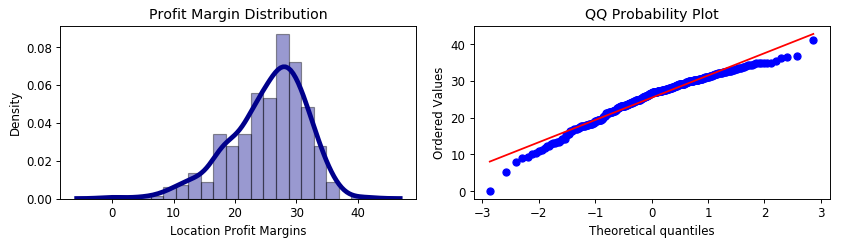

In [362]:
plt.figure(figsize=(10, 3), dpi= 85)

dist = plt.subplot(1,2,1)
sns.distplot(ssByLoc['Profit Margin'], hist=True, kde=True, bins=20, color = 'darkblue', 
             hist_kws={'edgecolor':'black'}, 
             kde_kws={'linewidth': 4})
dist.set_title('Profit Margin Distribution')
dist.set_ylabel('Density')
dist.set_xlabel('Location Profit Margins')

qq = plt.subplot(1, 2, 2)
stats.probplot(ssByLoc['Profit Margin'], dist="norm", plot=pylab)
qq.set_title("QQ Probability Plot")

plt.tight_layout()

As we can see the Data follows a fairly Normal Distribution, but is slight skewed to the left, as the Mean is just slightly smaller than the Median. The Density function of the distribution follows a bell-curve pattern and the QQ plot fits the line fairly well

#### 2)

In [300]:
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [301]:
rev_Data = rawData[['Month', 'Gross revenue']].copy().groupby(['Month']).sum()
rev_Data.index = list(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
rev_Data.rename(columns= {0:'Monthly Gross revenue'})

qData = pd.DataFrame(rev_Data.values.reshape(-1, 3).sum(1)).rename(columns={0: "Quarterly Gross Revenue"})
qData.index = list(['Q1', 'Q2', 'Q3', 'Q4'])

display_side_by_side(rev_Data.astype('int64'), qData.astype('int64'))

,Gross revenue
Jan,9304129223
Feb,9786842932
Mar,11587361200
Apr,9105208425
May,9347461485
Jun,11297643513
Jul,9005478090
Aug,9625942279
Sep,11249652068
Oct,9413548683


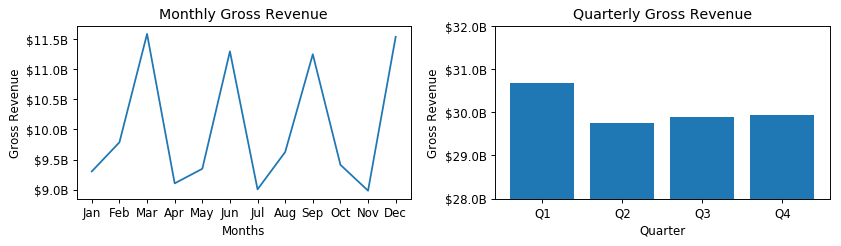

In [360]:
def Billions(x, pos):
    'The two args are the value and tick position'
    return '$%1.1fB' % (x*1e-9)

formatterb = plt.FuncFormatter(Billions)
index = qData.index
index2 = rev_Data.index

plt.figure(figsize=(10, 3), dpi= 85)

ax = plt.subplot(1, 2, 1)
ax.yaxis.set_major_formatter(formatterb)
plt.plot(index2, rev_Data['Gross revenue'])
plt.xlabel('Months', fontsize=10)
plt.ylabel('Gross Revenue', fontsize=10)
plt.xticks(index2, fontsize=10, rotation=0)
plt.title('Monthly Gross Revenue')


ax = plt.subplot(1, 2, 2)
ax.yaxis.set_major_formatter(formatterb)
plt. = 'viridis'
ax.set(ylim=[28000000000, 32000000000])
plt.bar(index, qData['Quarterly Gross Revenue'])
plt.xlabel('Quarter', fontsize=10)
plt.ylabel('Gross Revenue', fontsize=10)
plt.xticks(index, fontsize=10, rotation=0)
plt.title('Quarterly Gross Revenue')


plt.tight_layout()

## Part 2 - Cleaning the data

The Rental Cost of a property is classified as a Fixed cost. Before we could perform any further analyses on the data we needed to remove Rental Cost from Fixed Cost so as to not be counted twice. Next, we found the annual average value of every accounting item at each store. We then separated the data into two sets; one where the locations are owned, and one where they are rented. 

To impute the most accurate data, we trained a Random Forest Regression on the Rented data set, and ran it on the Owned data set. Due to the categorical variable "State", we had to One Hot Encode our values prior to training the data. We also run a Mean Accuracy Precision Test on the model to see how closely the model predicts the actual Rental Cost.

In [621]:
iData = accountingData.copy()
iData['Fixed cost'] = iData['Fixed cost'] - iData['Rental cost']
iData['Rental cost'].replace(0, np.nan, inplace=True)
iData.head()

,Location number,Month,State,Gross revenue,Fixed cost,Variable cost,Rental cost,Number of products,Owned,Total cost,Net income
0,1,1,TX,48628171.02,8852276.69,24278189.23,365880.0,4452,False,33496345.92,15131825.10
1,1,2,TX,48107179.24,10221867.35,25116844.41,365880.0,4452,False,35704591.76,12402587.48
2,1,3,TX,64352278.29,9827993.77,33703499.83,365880.0,4452,False,43897373.60,20454904.69
3,1,4,TX,45943677.96,8398285.00,24037719.47,365880.0,4452,False,32801884.47,13141793.49
4,1,5,TX,32761434.98,7656236.43,16432119.18,365880.0,4452,False,24454235.61,8307199.37


In [622]:
avgByLoc = iData[['Location number', 'Fixed cost',
                  'Rental cost', 'Number of products','Net income']].copy()
avgByLoc = avgByLoc.groupby('Location number').mean()

states_dict = dict(zip(iData['Location number'], iData['State']))
owned_dict = dict(zip(iData['Location number'], iData['Owned']))

avgByLoc['State'] = impute.index.map(states_dict)
avgByLoc['Owned'] = impute.index.map(owned_dict)
avgByLoc.head()

,Fixed cost,Rental cost,Number of products,Net income,State,Owned
Location number,,,,,,
1,8.875418e+06,365880.0,4452,1.287288e+07,TX,False
2,6.007559e+06,65270.0,4502,7.447497e+06,TX,False
3,5.358146e+06,NaN,4620,6.887182e+06,IL,True
4,5.200598e+06,141410.0,4481,4.720034e+06,GA,False
5,3.654708e+06,74500.0,4533,3.374648e+06,NJ,False


In [1129]:
ownedData = avgByLoc[avgByLoc['Owned'] == True]
ownedData = ownedData.drop(columns=['Owned'])

In [1065]:
rentedData = avgByLoc[avgByLoc['Owned'] == False]
rentedData = rentedData.drop(columns=['Owned'])

In [1062]:
ohe = pd.get_dummies(rentedData)

rentalCost = np.array(ohe['Rental cost'])
ohe = ohe.drop('Rental cost', axis = 1)

ohe_list = list(ohe.columns)
x = np.array(ohe)

In [626]:
train_x, test_x, train_y, test_y = train_test_split(x, rentalCost, test_size = 0.25, random_state = 50)

In [627]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 50)
rf.fit(train_x, train_y);

In [628]:
predictions = rf.predict(test_x)
errors = abs(predictions - test_y)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 51228.28 degrees.


In [629]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_y)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 54.54 %.


Now that the model has been trained, we apply it to our Owned data set to find the best set of values to impute. Finally, once we have the imputed values Rental Cost, we add all Rental Costs back into Fixed Cost and recalculate the rent-adjusted mean/median Profit Margin. With our imputed data, we actually tighten the spread between mean and median giving us an even more normal distribution.

In [630]:
oheOwned = pd.get_dummies(ownedData)
labels = np.array(oheOwned['Rental cost'])
oheOwned = oheOwned.drop('Rental cost', axis = 1)
ohe_list = list(oheOwned.columns)
x2 = np.array(oheOwned)
predictions2 = rf.predict(x2)

In [631]:
ownedData['imputed'] = predictions2
imputed_dict = dict(zip(ownedData.index, ownedData['imputed']))

In [1066]:
iData['rentImpute'] = iData['Location number'].map(imputed_dict)
iData['Rental cost'] = iData['Rental cost'].fillna(iData['rentImpute'])

In [646]:
cleanData = iData.copy()
cleanData['Fixed cost'] = cleanData['Fixed cost'] + cleanData['Rental cost']
cleanData = cleanData.drop(columns = ['rentImpute', 'Net income', 'Total cost'])
cleanData.head()

,Location number,Month,State,Gross revenue,Fixed cost,Variable cost,Rental cost,Number of products,Owned
0,1,1,TX,48628171.02,9218156.69,24278189.23,365880.0,4452,False
1,1,2,TX,48107179.24,10587747.35,25116844.41,365880.0,4452,False
2,1,3,TX,64352278.29,10193873.77,33703499.83,365880.0,4452,False
3,1,4,TX,45943677.96,8764165.00,24037719.47,365880.0,4452,False
4,1,5,TX,32761434.98,8022116.43,16432119.18,365880.0,4452,False


In [652]:
accountDataClean = cleanData.copy()
accountDataClean['Total cost'] = accountDataClean['Variable cost'] + accountDataClean['Fixed cost']
accountDataClean['Net income'] = accountDataClean['Gross revenue'] - accountDataClean['Total cost']

In [653]:
ssByLocClean = accountDataClean[['Location number', 'Gross revenue', 'Fixed cost',
                   'Variable cost', 'Total cost', 'Net income']].copy()
ssByLocClean = ssByLocClean.groupby('Location number').sum()
ssByLocClean['Profit Margin'] = (100*(ssByLocClean['Net income'] / ssByLocClean['Gross revenue']))
ssByLocClean.head()

,Gross revenue,Fixed cost,Variable cost,Total cost,Net income,Profit Margin
Location number,,,,,,
1,5.447389e+08,1.108956e+08,2.793687e+08,3.902643e+08,1.544746e+08,28.357547
2,3.559730e+08,7.287395e+07,1.937291e+08,2.666030e+08,8.936996e+07,25.105826
3,3.317718e+08,6.580399e+07,1.848279e+08,2.506319e+08,8.113994e+07,24.456550
4,2.639843e+08,6.410409e+07,1.432398e+08,2.073439e+08,5.664041e+07,21.455975
5,1.890016e+08,4.475050e+07,1.037553e+08,1.485058e+08,4.049578e+07,21.426157


In [658]:
print('Raw Mean:', ssByLoc['Profit Margin'].mean())
print('Raw Median:', ssByLoc['Profit Margin'].median())

Raw Mean: 25.401183118537112
Raw Median: 26.711186779772767


In [657]:
print('Rent-adjusted Mean:', ssByLocClean['Profit Margin'].mean())
print('Rent-adjusted Median:', ssByLocClean['Profit Margin'].median())

Rent-adjusted Mean: 25.361040394126736
Rent-adjusted Median: 26.5667964396534


## Part 3 - Quantify drivers of success

To begin looking for revenue drivers, we first sought to visualize the data to see if anything stood out. We visualized the data by Geography and first looked at accounting items such as Gross Revenue and Total Cost. For the most part, they Revenue and Total Cost shares were in line with the number of stores in each state. We notice, that New Jersey and Illinois tends to have high costs relative to their Gross Revenue. This could potentially signal lower Profit Margins in these states.

Next we moved towards building a regression model to see if any of our indicators were good predictors of high Profit Margins. Gross Revenue, Fixed Cost, Variable Cost, and Rental Cost are all confounding with Profit Margins, as they are used to calculate it. We tried to see if we could find a relationship between the number of products and geographic location. 

Once again we used dummy variables for the categorical variable "States". Next we ran a Multiple Linear Regression and found significance. We are able to identify a significant correlation between higher Profit Margins and Number of Products and select states. We checked our regression assumptions by testing the model residual assumptions. We concluded that the residuals have a constant variance, are approximately normally distributed, and independent of one another. 

We further performed fundamental analyses on the data to look for any patterns in the data that could lead to an arbitrage opportunity. We studied the liquidity of each location trying to determine were efficiencies could be found. A key metric we looked at during this time was contribution margin.

In [738]:
states_dict = dict(zip(cleanData['Location number'], cleanData['State']))
owned_dict = dict(zip(cleanData['Location number'], cleanData['Owned']))
products_dict = dict(zip(cleanData['Location number'], cleanData['Number of products']))

ssByLocClean['State'] = ssByLocClean.index.map(states_dict)
ssByLocClean['Owned'] = ssByLocClean.index.map(owned_dict)
ssByLocClean['Number of products'] = ssByLocClean.index.map(products_dict)

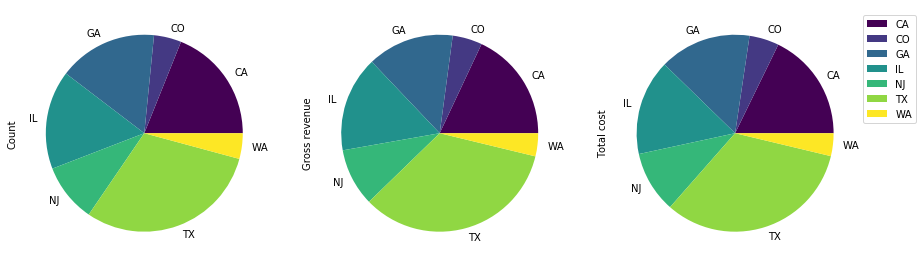

In [740]:
count = ssByLocClean.groupby('State').count()
sums = ssByLocClean.groupby('State').sum()
count = count[['Fixed cost']]
count.columns = ['Count']
count['Gross revenue'] = sums['Gross revenue']
count['Total cost'] = sums['Total cost']
plot = count.plot.pie(subplots=True, figsize=(15, 5), colormap = 'viridis', legend=False)
plt.legend(bbox_to_anchor=(1, 1))


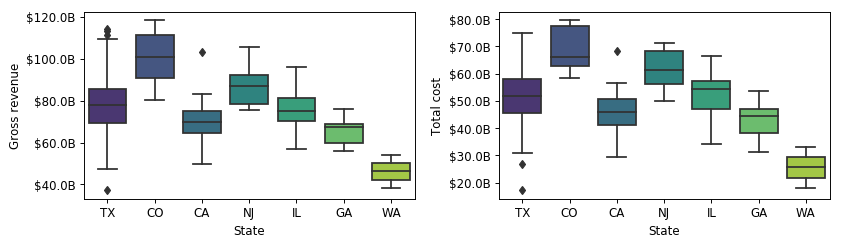

In [1080]:
def Millions(x, pos):
    'The two args are the value and tick position'
    return '$%1.1fB' % (x*1e-6)

formatterb = plt.FuncFormatter(Millions)
plt.figure(figsize=(10, 3), dpi= 85)

a = plt.subplot(1, 2, 1)
sns.boxplot(x="State", y="Gross revenue", data=loss, palette="viridis")
a.yaxis.set_major_formatter(formatterb)
box.set_title("Monthly Gross Revenue by State")

b = plt.subplot(1, 2, 2)
sns.boxplot(x="State", y="Total cost", data=loss, palette="viridis")
b.yaxis.set_major_formatter(formatterb)
box.set_title("Monthly Total Cost by State")

plt.tight_layout()

In [1081]:
regData = ssByLocClean[['State', 'Owned', 'Number of products', 'Profit Margin']].copy()

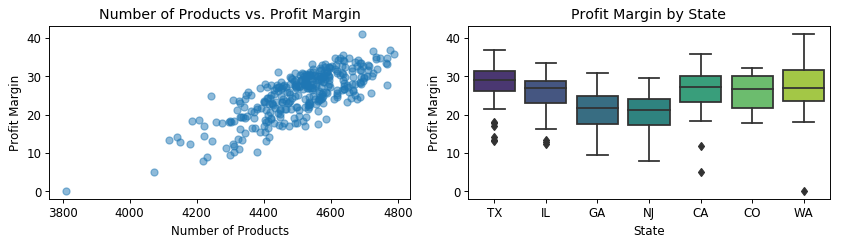

In [785]:
plt.figure(figsize=(10, 3), dpi= 85)

a = plt.subplot(1, 2, 1)
x = regData['Number of products'] 
y = regData['Profit Margin']
plt.scatter(x, y,alpha=0.5)
plt.title('Number of Products vs. Profit Margin')
plt.xlabel('Number of Products')
plt.ylabel('Profit Margin')
# regData.plt.boxplot(by='State', column=['Profit Margin'], grid=False)

box = plt.subplot(1, 2, 2)
sns.boxplot(x="State", y="Profit Margin", data=regData, palette="viridis")
box.set_title("Profit Margin by State")

plt.tight_layout()

In [800]:
regDatOHE = pd.get_dummies(regData)
regDatOHE
print(regDatOHE.columns)

Index(['Number of products', 'Profit Margin', 'State_CA', 'State_CO',
       'State_GA', 'State_IL', 'State_NJ', 'State_TX', 'State_WA',
       'Owned_False', 'Owned_True'],
      dtype='object')


In [855]:
x = regDatOHE[['Number of products', 'State_CA', 'State_CO', 'State_TX', 'State_WA']]
y = regDatOHE['Profit Margin']
X = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
 
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Profit Margin   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     254.1
Date:                Mon, 16 Sep 2019   Prob (F-statistic):          2.61e-110
Time:                        01:17:15   Log-Likelihood:                -810.57
No. Observations:                 333   AIC:                             1633.
Df Residuals:                     327   BIC:                             1656.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -139.4862      5.121    -27.239      0.000    -149.560    -129.412
Number of products     0.0359      0.001     31.684      0.000       0.034       0.038
State_CA               4.4806      0.423     10.594      0.000       3.649       5.313
State_CO               2.9865      0.757      3.946      0.000       1.498       4.475
State_TX               5.8710      0.364     16.146      0.000       5.156       6.586
State_WA               4.7877      0.782      6.120      0.000       3.249       6.327
==============================================================================
Omnibus:                        2.061   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.357   Jarque-Bera (JB):                1.965
Skew:                          -0.050   Prob(JB):                        0.374
Kurtosis:                       3.363   Cond. No.                     1.51e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

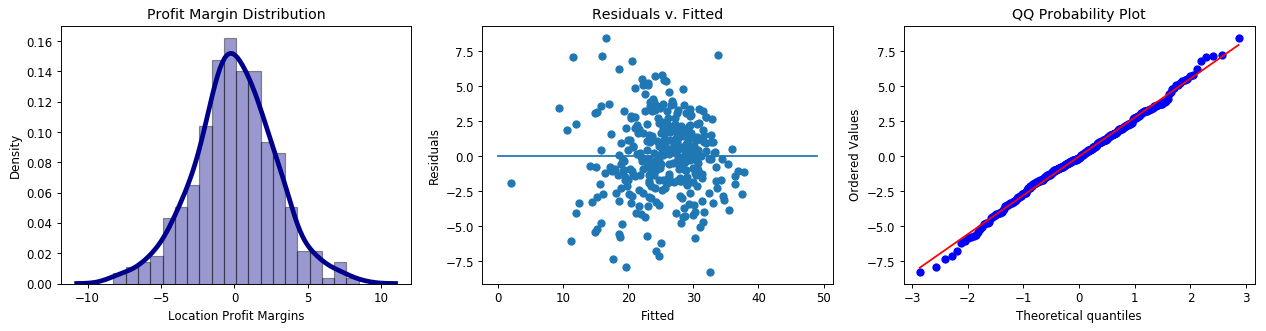

In [897]:
plt.figure(figsize=(15, 4), dpi= 85)

pred_val = model.fittedvalues.copy()
true_val = regDatOHE['Profit Margin'].values.copy()
residual = true_val - pred_val

dist = plt.subplot(1,3,1)
sns.distplot(residual, hist=True, kde=True, bins=20, color = 'darkblue', 
             hist_kws={'edgecolor':'black'}, 
             kde_kws={'linewidth': 4})
dist.set_title('Profit Margin Distribution')
dist.set_ylabel('Density')
dist.set_xlabel('Location Profit Margins')

ax = plt.subplot(1, 3, 2)
#fig, ax = plt.subplots(figsize=(6,2.5))
ax.scatter(pred_val, residual)
X_plot = np.linspace(0,0,50)
plt.plot(X_plot)
ax.set_title('Residuals v. Fitted')
ax.set_ylabel('Residuals')
ax.set_xlabel('Fitted')

qq2 = plt.subplot(1, 3, 3)
stats.probplot(residual, dist="norm", plot=pylab)
qq2.set_title("QQ Probability Plot")

plt.tight_layout()

In [1051]:
j = ssByLocClean.copy()
j = j.drop(columns = ['State', 'Owned'])
j['Contribution Margin'] = (j['Gross revenue'] - j['Variable cost'])/j['Number of products']
j['BE Unit'] = j['Fixed cost'] / j['Contribution Margin']
j['ACPU'] = j['Total cost'] / j['Number of products']
j['Break Even'] = j['ACPU']*j['BE Unit']
j['Bankrupt'] = j['Gross revenue'] - j['Break Even']
j = j.sort_values('Bankrupt', ascending = True)
j.head().astype('int64')

,Gross revenue,Fixed cost,Variable cost,Total cost,Net income,Profit Margin,Number of roducts,Number of products,Contribution Margin,BE Unit,ACPU,Break Even,Bankrupt
Location number,,,,,,,,,,,,,
157,80236324,30791322,49317383,80108706,127618,0,3810,3810,8115,3794,21025,79778056,458267
318,78200484,31010812,36695764,67706577,10493906,13,4117,4117,10081,3076,16445,50587885,27612598
126,144771219,48201991,85254812,133456804,11314415,7,4218,4218,14110,3416,31639,108085889,36685329
13,109103553,35387757,61542292,96930049,12173503,11,4289,4289,11089,3191,22599,72120397,36983155
298,98228731,29218287,56820281,86038568,12190162,12,4180,4180,9906,2949,20583,60709821,37518909


In [1082]:
t = accountDataClean.copy().drop(columns = ['Location number','Rental cost', 'Number of products', 'Owned'])
t = t.groupby('Month').sum()
t['contribution margin'] = 100*(t['Gross revenue'] - t['Variable cost'])/t['Gross revenue']
t.head()

,Gross revenue,Fixed cost,Variable cost,Total cost,Net income,contribution margin
Month,,,,,,
1,9.304129e+09,2.074683e+09,4.943004e+09,7.017687e+09,2.286442e+09,46.873012
2,9.786843e+09,1.969538e+09,5.180280e+09,7.149818e+09,2.637025e+09,47.068935
3,1.158736e+10,2.302041e+09,6.126065e+09,8.428105e+09,3.159256e+09,47.131496
4,9.105208e+09,1.920667e+09,4.754642e+09,6.675309e+09,2.429900e+09,47.781073
5,9.347461e+09,1.882437e+09,4.860179e+09,6.742615e+09,2.604846e+09,48.005364


In [1084]:
pct = t.pct_change()
pct.head()

,Gross revenue,Fixed cost,Variable cost,Total cost,Net income,contribution margin
Month,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN
2,0.051882,-0.050680,0.048003,0.018828,0.153331,0.004180
3,0.183973,0.168823,0.182574,0.178786,0.198038,0.001329
4,-0.214212,-0.165668,-0.223867,-0.207970,-0.230863,0.013782
5,0.026606,-0.019905,0.022197,0.010083,0.071998,0.004694


## Appendix

### i

In [1144]:
append = avgByLoc.copy()
append['Rental cost'] = append['Rental cost'].fillna(append['Rental cost'].mean())

In [1152]:
ohe2 = pd.get_dummies(append)

rentalCost2 = np.array(ohe2['Rental cost'])
ohe2 = ohe2.drop('Rental cost', axis = 1)

ohe_list2 = list(ohe2.columns)
x2 = np.array(ohe2)

In [1153]:
train_x2, test_x2, train_y2, test_y2 = train_test_split(x2, rentalCost2, test_size = 0.25, random_state = 50)
rf2 = RandomForestRegressor(n_estimators = 1000, random_state = 50)
rf2.fit(train_x2, train_y2);

In [1154]:
predictions2 = rf2.predict(test_x2)
errors2 = abs(predictions2 - test_y2)
print('Mean Absolute Error:', round(np.mean(errors2), 2), 'degrees.')

Mean Absolute Error: 41539.29 degrees.


In [1155]:
mape2 = 100 * (errors2 / test_y2)
accuracy2 = 100 - np.mean(mape2)
print('Accuracy:', round(accuracy2, 2), '%.')

Accuracy: 57.98 %.


### ii

In [1077]:
accounts = rawData[['Month', 'State','Gross revenue']].copy()
monthlyData = accounts.groupby(['Month', 'State']).sum()
monthlyData = monthlyData.unstack(level = 1)
monthlyData.columns = monthlyData.columns.droplevel(0)

In [1078]:
qData2 = monthlyData.groupby(np.arange(len(monthlyData)) //3).sum()
quarters = ['Q1', 'Q2', 'Q3', 'Q4']
qData2['Quarters'] = quarters
qData2 = qData2.set_index('Quarters')

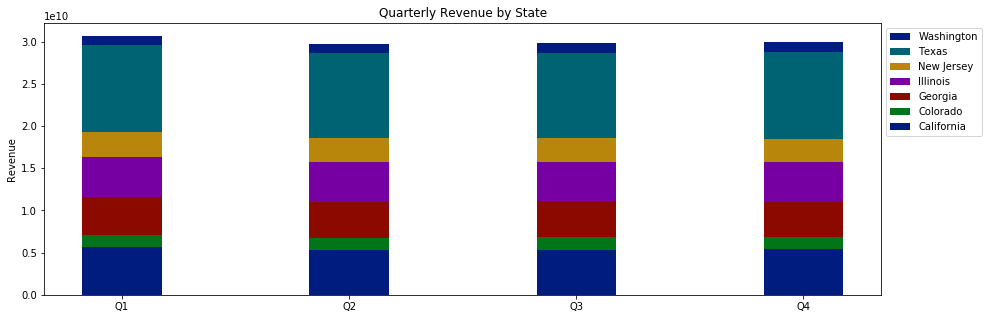

In [1076]:
plt.figure(figsize=(15,5))

w = 0.35
index = qData2.index
graphCA = plt.bar(x=index, height= qData2['CA'], width = w)
graphCO = plt.bar(x=index, height= qData2['CO'], width = w, bottom = qData2['CA'])
graphGA = plt.bar(x=index, height= qData2['GA'], width = w, bottom = qData2['CA'] + qData2['CO'])
graphIL = plt.bar(x=index, height= qData2['IL'], width = w, bottom = qData2['CA'] + qData2['CO'] + qData2['GA'])
graphNJ = plt.bar(x=index, height= qData2['NJ'], width = w,
                  bottom = qData2['CA'] + qData2['CO'] + qData2['GA'] + qData2['IL'])
graphTX = plt.bar(x=index, height= qData2['TX'],
                  width = w, bottom = qData2['CA'] + qData2['CO'] + qData2['GA'] + qData2['IL'] + qData2['NJ'])
graphWA = plt.bar(x=index, height= qData2['WA'], width = w,
                  bottom = qData2['CA'] + qData2['CO'] + qData2['GA'] + qData2['IL'] + qData2['NJ'] + qData2['TX'])

plt.ylabel('Revenue')
plt.title('Quarterly Revenue by State')
plt.legend((graphWA, graphTX, graphNJ, graphIL, graphGA, graphCO, graphCA),
           ('Washington', 'Texas', 'New Jersey', 'Illinois', 'Georgia','Colorado', 'California'),
           bbox_to_anchor=(1, 1))
plt.style.use('seaborn-dark-palette')

### iii

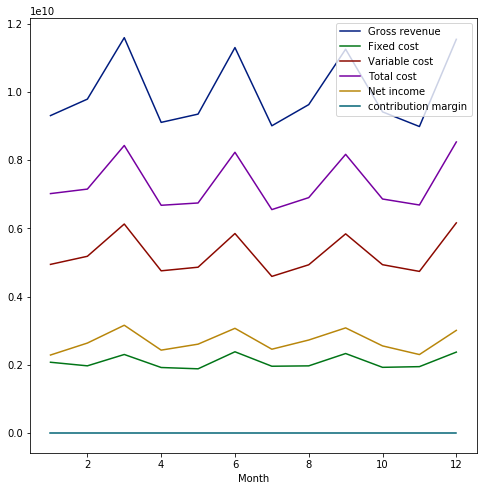

In [1085]:
lines = t.plot.line(figsize = (8,8))

### iv

In [1086]:
lowHigh = ssByLocClean.copy().sort_values('Profit Margin')
lowHigh = lowHigh.reset_index(drop = False)
IQR = 1.5*(stats.iqr(lowHigh['Profit Margin']))
q1 = np.quantile(lowHigh['Profit Margin'], q = .25)
q3 = np.quantile(lowHigh['Profit Margin'], q = .75)
q1-IQR
Outlier = lowHigh.iloc[0:5,]
Outliers = lowHigh.iloc[5:,]
Outliers['Profit Margin'].mean()

25.65152046903497

Text(0.5, 1.0, 'Profit Margin Distribution')

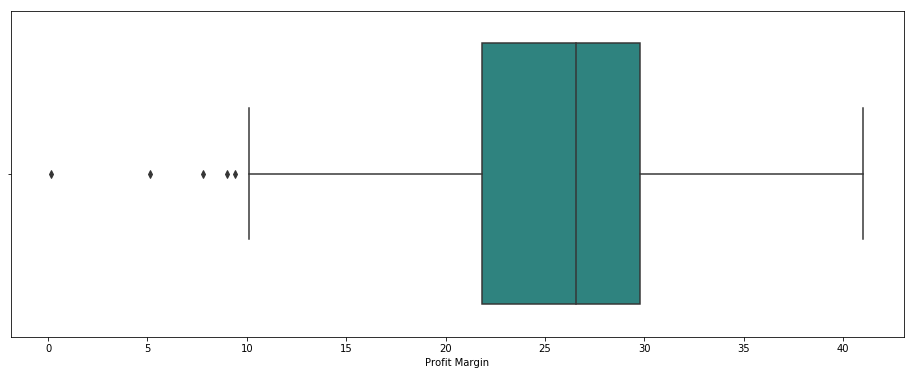

In [1094]:
plt.figure(figsize=(16, 6))
sns.boxplot(x="Profit Margin", data=regData, palette="viridis")
box.set_title("Profit Margin Distribution")